In [1]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# carregar dataframe
sui = pd.read_csv('df_atualizada.csv')

In [3]:
# visualizar colunas sem omissão
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# visualizar dataframe
sui.head()

,CODMUNNATU,CODMUNOCOR,CODMUNRES,NATURAL,CAUSABAS,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESCFALAGR1,OCUP,suicidio,OCUP_INT,IDADE_INT,idade_real,CODMUNNATU_INT,NATURAL_INT,RACACOR_INT,ESTCIV_INT,ESC_INT,ESCFALAGR1_INT
0,120020,410690,120020,812,C258,460.0,2,1,2,3,11,999992.0,0,999992,460,60,120020,812,1,2,3,11
1,411610,120040,120040,841,B342,455.0,2,1,2,5,8,241005.0,0,241005,455,55,411610,841,1,2,5,8
2,412650,120040,120040,841,B342,485.0,1,1,2,3,11,354705.0,0,354705,485,85,412650,841,1,2,3,11
3,411190,110020,120040,841,B342,471.0,1,1,0,0,0,782510.0,0,782510,471,71,411190,841,1,0,0,0
4,412650,120040,120040,841,B342,479.0,2,1,2,4,12,0.0,0,0,479,79,412650,841,1,2,4,12


In [4]:
# definir novo dataframe
df = sui[[ 'suicidio', 'IDADE_INT', 'idade_real', 'CODMUNNATU_INT', 'CODMUNOCOR', 'CODMUNRES', 'NATURAL_INT', 'RACACOR_INT', 'ESTCIV_INT', 'ESC_INT', 'ESCFALAGR1_INT', 'CAUSABAS', 'SEXO', 'RACACOR', 'OCUP_INT']]

In [5]:
# exibir dataframe
df.head()

,suicidio,IDADE_INT,idade_real,CODMUNNATU_INT,CODMUNOCOR,CODMUNRES,NATURAL_INT,RACACOR_INT,ESTCIV_INT,ESC_INT,ESCFALAGR1_INT,CAUSABAS,SEXO,RACACOR,OCUP_INT
0,0,460,60,120020,410690,120020,812,1,2,3,11,C258,2,1,999992
1,0,455,55,411610,120040,120040,841,1,2,5,8,B342,2,1,241005
2,0,485,85,412650,120040,120040,841,1,2,3,11,B342,1,1,354705
3,0,471,71,411190,110020,120040,841,1,0,0,0,B342,1,1,782510
4,0,479,79,412650,120040,120040,841,1,2,4,12,B342,2,1,0


In [6]:
# Caminho onde deseja salvar o arquivo CSV localmente
file_path = '/Users/leonardozara/Documents/Suicidio/df_atualizada_2.csv'

# Salvar o DataFrame como um arquivo CSV
df.to_csv(file_path, index=False)  # Use index=False para não incluir o índice no arquivo CSV

# Modelo de Árvore de decisão

In [7]:
# definindo variáveis para as variáveis dependentes e independentes (target e data)
from sklearn import tree

# carregando dataframe para modelo de previsao
dataframe = pd.read_csv('df_atualizada_2.csv')

dff = dataframe.drop('CAUSABAS', axis=1)

# definindo as variaveis dependente (y) e independentes (X)
X = dff.drop('suicidio', axis=1) # novo dataframe de variáveis independentes e retirar variável dependente ('suicidio' -> axis = eixo das colunas)
y = dff['suicidio']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# treinar classificador
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

In [8]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.98


# Validação cruzada

Para definirmos as '''limitações de folhas e profundidade''' do modelo, é necessário realizar uma validação cruzada, a fim de equilibrar enviesamento e variância, evitando subajuste e sobreajuste do modelo aos dados.

In [9]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [10]:
# dicionário com valores de profundidade máxima e mínimo de folhas para 
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_leaf': [1, 2, 4 ,6, 8, 10]
}

# Instanciar GridSearchCV
grid_search = GridSearchCV(
    estimator=clf, # parâmetro estimator implementa interface estimação, precisa receber função para estimar (clf no caso) 
    param_grid=param_grid, # o parâmetro param_grid recebe um dicionário com chaves e listas com valores para serem explorados   
    cv=5, # parametro cv define a estratégia de divisão para Cross Validation (cv)
    n_jobs=-1, #
    verbose=2 # controle de verbosidade, quanto maior mais informações ou mensagens (2 -> score is also displayed)
)

# Ajustar o grid_search aos dados do treinamento do modelo
grid_search.fit(X_train, y_train)

# visualizar os melhores parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Melhores parâmetros: {'max_depth': 5, 'min_samples_leaf': 8}


Acurácia: 0.9904946121239977
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    155159
           1       0.00      0.00      0.00      1489

    accuracy                           0.99    156648
   macro avg       0.50      0.50      0.50    156648
weighted avg       0.98      0.99      0.99    156648



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


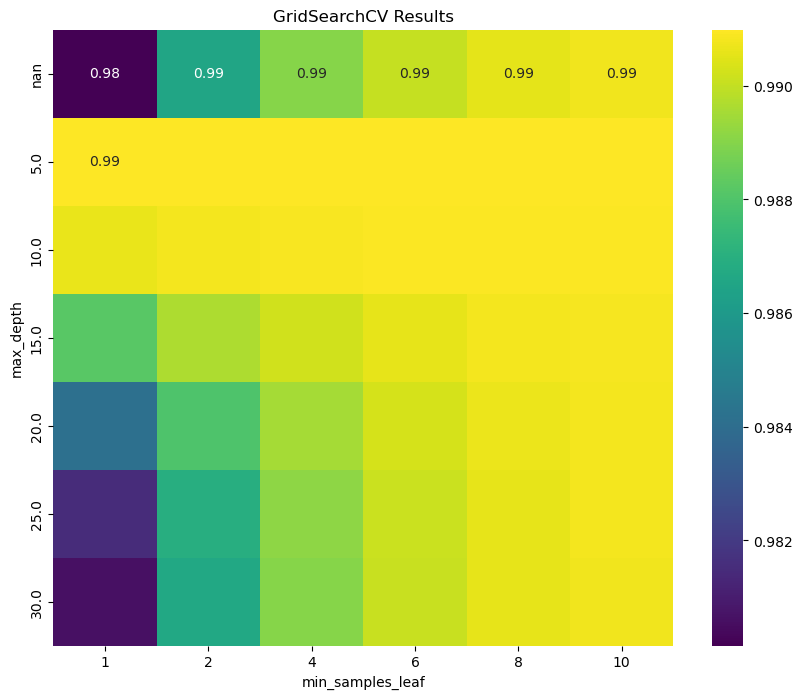

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Fazer previsões com o conjunto de teste usando o melhor modelo
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Avaliar o desempenho
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(f"Relatório de Classificação:\n{classification_report(y_test, y_pred)}")

# Visualizar os resultados da validação cruzada
results = pd.DataFrame(grid_search.cv_results_)

# Gráfico de calor dos resultados
scores_matrix = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score')

plt.figure(figsize=(10, 8))
plt.title("GridSearchCV Results")
sns.heatmap(scores_matrix, annot=True, cmap="viridis")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")
plt.show()

## Aprendizado desbalanceado 

Aparentemente teremos que utilizar uma biblioteca chamada [Imbalanced Learn](https://imbalanced-learn.org/stable/index.html), que aumenta a quantidade de variáveis targets para o modelo.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................max_depth=5, min_samples_leaf=2; total time= 1.4min
[CV] END ....................max_depth=5, min_samples_leaf=4; total time= 1.3min
[CV] END ...................max_depth=10, min_samples_leaf=2; total time= 2.3min
[CV] END ...................max_depth=10, min_samples_leaf=4; total time= 2.1min
[CV] END ...................max_depth=15, min_samples_leaf=2; total time= 2.7min
[CV] END .................max_depth=None, min_samples_leaf=1; total time= 3.5min
[CV] END .................max_depth=None, min_samples_leaf=2; total time= 3.4min
[CV] END ....................max_depth=5, min_samples_leaf=2; total time= 1.4min
[CV] END ....................max_depth=5, min_samples_leaf=4; total time= 1.3min
[CV] END ...................max_depth=10, min_samples_leaf=2; total time= 2.3min
[CV] END ...................max_depth=15, min_samples_leaf=1; total time= 2.8min
[CV] END ...................max_depth=15, min_sa

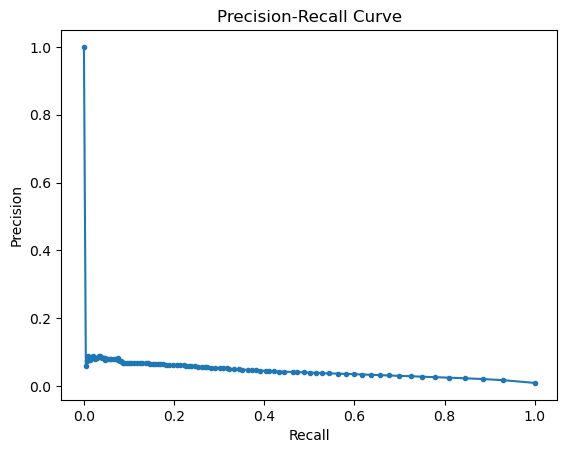

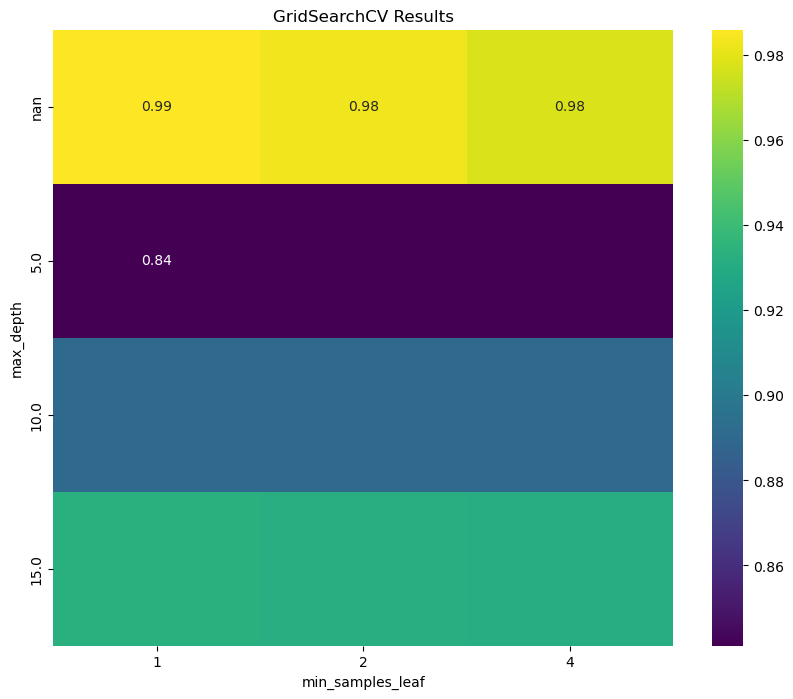

[CV] END ....................max_depth=5, min_samples_leaf=1; total time= 1.4min
[CV] END ....................max_depth=5, min_samples_leaf=4; total time= 1.3min
[CV] END ...................max_depth=10, min_samples_leaf=1; total time= 2.3min
[CV] END ...................max_depth=10, min_samples_leaf=4; total time= 2.1min
[CV] END ...................max_depth=15, min_samples_leaf=2; total time= 2.7min
[CV] END ...................max_depth=15, min_samples_leaf=4; total time= 2.7min
[CV] END .................max_depth=None, min_samples_leaf=2; total time= 3.5min


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Load dataframe for prediction model
dataframe = pd.read_csv('df_atualizada_2.csv')
df = dataframe.drop('CAUSABAS', axis=1)

# Define dependent (y) and independent (X) variables
X = df.drop('suicidio', axis=1)
y = df['suicidio']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Define simplified parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model with class weights
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Instantiate GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=cv, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the test set using the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Plot precision-recall curve
y_scores = best_clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Visualize cross-validation results
results = pd.DataFrame(grid_search.cv_results_)

# Create heatmap of results
scores_matrix = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score')

plt.figure(figsize=(10, 8))
plt.title("GridSearchCV Results")
sns.heatmap(scores_matrix, annot=True, cmap="viridis")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")
plt.show()

### Reflexões
Com base no resultado e na natureza dos seus dados, o principal problema parece ser o **desequilíbrio de classes**. 

1. **Desequilíbrio de classe**: Conjunto de dados altamente desequilibrado, conforme indicado pelo relatório de classificação:
   - A ```classe 0``` (*```não-suicídio```*) tem um grande número de amostras **```(155.221)```**.
   - A ```classe 1``` (*```suicídio```*) tem um número muito menor de amostras **```(1.427)```**.

   Este desequilíbrio pode levar o modelo a inclinar-se para a classe maioritária (classe 0) e pode resultar num fraco desempenho de previsão para a classe minoritária (classe 1).

2. **Impacto no treino do modelo**:
   - **Precisão**: A precisão global de 96,4% parece elevada, mas é distorcida pela classe dominante. É crucial olhar para além da precisão em conjuntos de dados desequilibrados.
   - **Precisão e recuperação**: Para a classe 1 (suicídio), a precisão (0,06) e a recuperação (0,21) são baixas.

    Isto sugere que o modelo identifica apenas uma pequena fração de instâncias positivas reais (baixa recuperação) e, quando prevê positivo, está frequentemente incorreto (baixa precisão).

3. **Consequências potenciais**:
   - **Misclassificação**: O modelo pode classificar incorretamente os casos de suicídio (falsos negativos), perdendo potencialmente oportunidades de intervenção.

    - **Preconceito em relação à classe maioritária**: O modelo pode ser demasiado otimista na previsão da classe maioritária (não suicida), negligenciando a classe minoritária.


4. **Exploração adicional**:
   - Investigar a importância das características para garantir que o modelo está a concentrar-se em preditores relevantes.
   - Considerar métodos de conjunto ou algoritmos diferentes que tratem melhor o desequilíbrio das classes, como o aumento do gradiente ou o conjunto de classificadores.

5. **Aqui está a tabela com os dados do output da célula acima**:

| **Parâmetros**                   | **Valores**                         |
|----------------------------------|-------------------------------------|
| **Best parameters**              | {'max_depth': None, 'min_samples_leaf': 1} |
| **Accuracy**                     | 0.9642638271794086                  |



| **Class**  | **Precision** | **Recall** | **F1-Score** | **Support** |
|------------|---------------|------------|--------------|-------------|
| **0**      | 0.99          | 0.97       | 0.98         | 155221      |
| **1**      | 0.06          | 0.21       | 0.09         | 1427        |



| **Métricas**      | **Valores**    |
|-------------------|----------------|
| **Accuracy**      | 0.96           |
| **Macro avg**     | 0.53 (Precision) / 0.59 (Recall) / 0.54 (F1-Score) |
| **Weighted avg**  | 0.98 (Precision) / 0.96 (Recall) / 0.97 (F1-Score) |
| **Total Support** | 156648         |


> Em resumo, a questão principal é o desequilíbrio entre o número de amostras nas duas classes (suicidas vs. não suicidas), que afecta a capacidade do modelo para generalizar e prever eficazmente para a classe minoritária (Suicídio –> Não (0) Sim (1)).
> Isso é evidenciado pela baixa precisão, recall e f1-score para a classe minoritária (classe 1), enquanto a classe majoritária (classe 0) tem desempenho muito superior



#### O que podemos fazer? 

Existe uma grande diferença no número de exemplos entre as classes preditivas – que pode levar a modelos que tendem a favorecer a classe majoritária em detrimento da classe minoritária.

1. **Implicações nos Resultados**: O modelo parece ter uma alta precisão para a ```classe 0 (Não Suicídio) (99%)```, mas uma baixa ```recall (21%) para a classe 1 (Suicídio)```. Isso significa que o modelo identifica corretamente a maioria das instâncias da classe 0, mas perde muitas instâncias da classe 1, resultando em um f1-score baixo para a classe 1 (9%).

2. **Soluções para Desequilíbrio de Classes**: 
   - **Reamostragem dos Dados**: Oversampling (aumento de exemplos da classe minoritária) e undersampling (redução de exemplos da classe majoritária).
       > Aqui podemos pegar os outros casos de suicidio da Bahia (BA) e Paraná (PR) registrados em anos anteriores aos do dataframe utilizado nesse modelo (2022, 2021, 2020 e assim por diante)
   - **Peso das Classes**: Atribuir pesos diferentes às classes para penalizar erros na classe minoritária durante o treinamento.
       > Consigo imaginar o que isso significa, mas preciso estudar um pouco mais a respeito de como aplicar isso técnicamente. 
   - **Métricas Apropriadas**: Além de accuracy, usar métricas como precision, recall, f1-score que são mais informativas em casos de desequilíbrio.

3. **Seleção do Modelo**: Dependendo do contexto e da importância de cada classe, pode ser necessário ajustar a métrica de avaliação ou escolher um modelo que seja mais robusto em lidar com classes desbalanceadas.
> Pode ser que esse seja uma última opção

Considerando esses pontos, avaliar e ajustar o tratamento do desequilíbrio de classes pode melhorar significativamente o desempenho do seu modelo, especialmente na capacidade de detectar instâncias da classe minoritária com mais precisão e recall.

In [ ]:
'''
# Plotar a árvore de decisão
plt.figure(figsize=(120, 80))  # Aumentei o tamanho da figura para melhor visualização
plot_tree(clf, feature_names=X.columns, class_names=['Não Suicídio', 'Suicídio'], filled=True)
# plt.savefig('tree_2.png', format='png', dpi=300)
plt.show()
'''

In [ ]:
'''
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(60, 30))  # Adjust figsize as needed

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['Não Suicídio', 'Suicídio'], filled=True, ax=ax)

# Save the figure
fig.savefig('tree_2.svg', format='svg', dpi=300)
'''

In [ ]:
'''
from sklearn.tree import export_graphviz

# Assuming clf is your trained decision tree and X is your DataFrame with feature names

# Export the decision tree to a dot file
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Não Suicídio', 'Suicídio'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Use graphviz to create a graph from the dot data
graph = graphviz.Source(dot_data)

# Save the graph as a PNG file
graph.render('tree_2', format='png')

# If you want to display the image within a Jupyter Notebook or an IPython environment:
# from IPython.display import Image
# Image(filename='tree_2.png')
'''

In [ ]:
'''
Implementar os seguintes codigos para expor .dot 

# Importar visualizacao gráfica e função de exportacao
from sklearn.tree import export_graphviz

# Fazer fit do modelo
modelo.fit(features_train,target_train)

# Fazer exportacao do grafico da arvore para .dot (copiar o cidog do arquivo .dot e usar https://dreampuf.github.io/GraphvizOnline para visualizar o gráfico e baixar em png)
export_graphviz(modelo, "arvore_test.dot")

'''